In [1]:
import pandas as pd 
import numpy as np

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("weatherAUS.csv") 

In [4]:
df.head()  

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [5]:
df.columns = df.columns.str.strip().str.replace(' ', '_').str.lower()  

In [6]:
df.head()

,date,location,mintemp,maxtemp,rainfall,evaporation,sunshine,windgustdir,windgustspeed,winddir9am,...,humidity9am,humidity3pm,pressure9am,pressure3pm,cloud9am,cloud3pm,temp9am,temp3pm,raintoday,raintomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [7]:
df.dtypes   

date              object
location          object
mintemp          float64
maxtemp          float64
rainfall         float64
evaporation      float64
sunshine         float64
windgustdir       object
windgustspeed    float64
winddir9am        object
winddir3pm        object
windspeed9am     float64
windspeed3pm     float64
humidity9am      float64
humidity3pm      float64
pressure9am      float64
pressure3pm      float64
cloud9am         float64
cloud3pm         float64
temp9am          float64
temp3pm          float64
raintoday         object
raintomorrow      object
dtype: object

In [8]:
df[['sunshine', 'humidity3pm', 'cloud3pm', 'evaporation']].isna().sum()   

sunshine       69835
humidity3pm     4507
cloud3pm       59358
evaporation    62790
dtype: int64

In [9]:
df.shape

(145460, 23)

In [10]:
df.dropna(inplace=True)

In [11]:
X = df[['sunshine', 'humidity3pm', 'cloud3pm', 'evaporation']]
y = df['raintomorrow'] == 'Yes'

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [13]:
x_train, x_test, y_train, y_test = train_test_split(X,y, random_state=0, test_size=0.2) 
dt = DecisionTreeClassifier()

In [14]:
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [15]:
from sklearn.metrics import accuracy_score

In [16]:
y_pred = dt.predict(x_test)   

print(accuracy_score(y_test, y_pred))      

0.7761432116270826


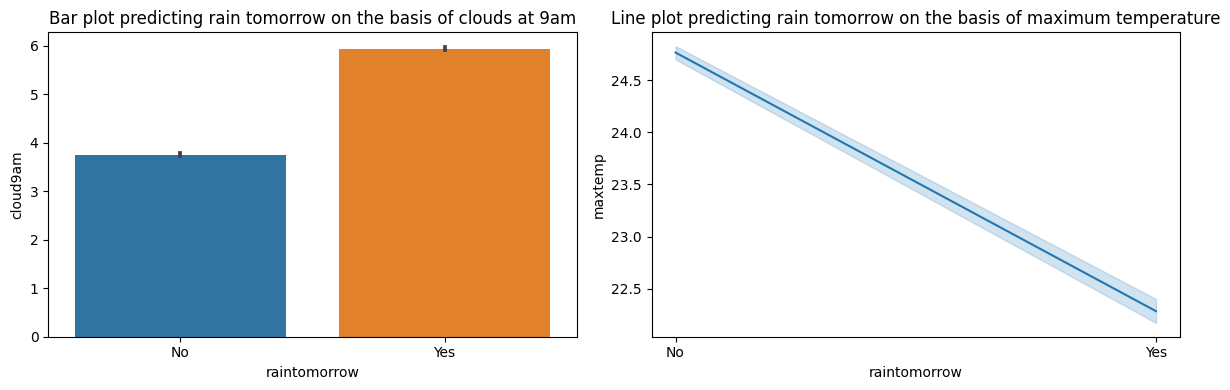

In [17]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))

sns.barplot(data=df, x="raintomorrow", y="cloud9am", ax=ax1)
ax1.set_title("Bar plot predicting rain tomorrow on the basis of clouds at 9am")


sns.lineplot(data=df, x="raintomorrow", y="maxtemp", ax=ax2)
ax2.set_title("Line plot predicting rain tomorrow on the basis of maximum temperature")

plt.tight_layout() 
plt.show()

In [18]:
from sklearn.metrics import precision_score, matthews_corrcoef

In [26]:
y_pr = dt.predict(x_test)
precision = precision_score(y_test, y_pr)
print(f'Precision: {precision:.4f}')

Precision: 0.4814


In [27]:
mcc = matthews_corrcoef(y_test, y_pred)
print(f'MCC: {mcc:.4f}')

MCC: 0.3524
